In [ ]:
!pip install pandas matplotlib

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("resultados_github.csv")
df.head()

,tipo,tempo_ms,tamanho_bytes
0,REST,267.039061,5020
1,REST,251.320124,5020
2,REST,202.954054,5020
3,REST,237.681627,5020
4,REST,264.796257,5020


In [3]:
desc = df.groupby("tipo").agg({
    "tempo_ms": ["mean", "std", "min", "max"],
    "tamanho_bytes": ["mean", "std", "min", "max"]
})

desc

tempo_ms                                    tamanho_bytes       \
               mean        std         min         max          mean  std   
tipo                                                                        
GraphQL  212.206801  21.812283  186.532736  272.601366         193.0  0.0   
REST     234.645557  23.568358  202.954054  313.890457        5020.0  0.0   

                     
          min   max  
tipo                 
GraphQL   193   193  
REST     5020  5020

In [4]:
rest = df[df["tipo"] == "REST"]
graphql = df[df["tipo"] == "GraphQL"]

ttempo = ttest_ind(rest["tempo_ms"], graphql["tempo_ms"])
ttamanho = ttest_ind(rest["tamanho_bytes"], graphql["tamanho_bytes"])

print("p-valor tempo:", ttempo.pvalue)
print("p-valor tamanho:", ttamanho.pvalue)

p-valor tempo: 0.00031991043866980883
p-valor tamanho: 0.0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


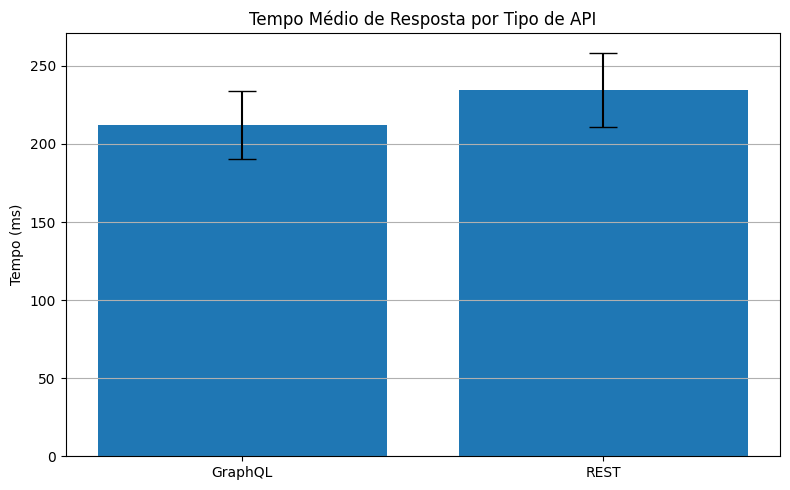

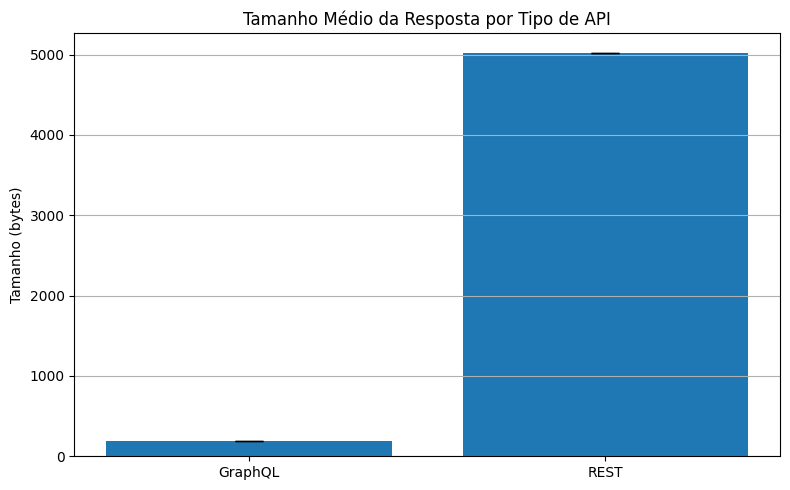

In [5]:
medias = df.groupby("tipo").mean(numeric_only=True)
stds = df.groupby("tipo").std(numeric_only=True)

plt.figure(figsize=(8, 5))
plt.bar(medias.index, medias["tempo_ms"], yerr=stds["tempo_ms"], capsize=10)
plt.title("Tempo Médio de Resposta por Tipo de API")
plt.ylabel("Tempo (ms)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(medias.index, medias["tamanho_bytes"], yerr=stds["tamanho_bytes"], capsize=10)
plt.title("Tamanho Médio da Resposta por Tipo de API")
plt.ylabel("Tamanho (bytes)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

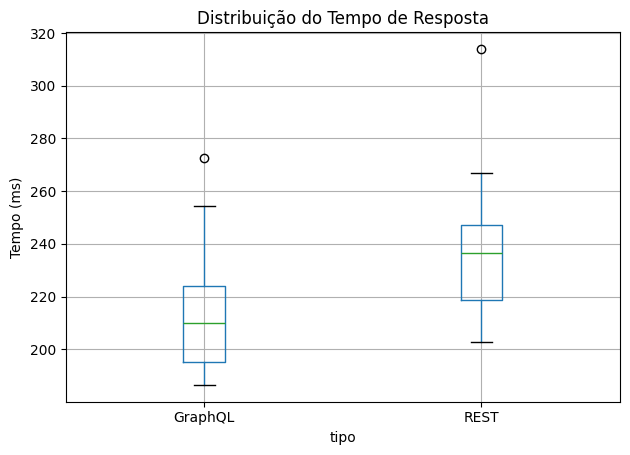

<Figure size 800x500 with 0 Axes>

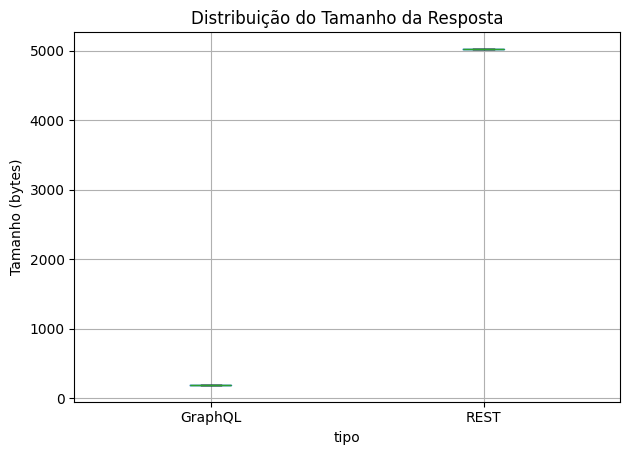

In [6]:
plt.figure(figsize=(8, 5))
df.boxplot(column="tempo_ms", by="tipo")
plt.title("Distribuição do Tempo de Resposta")
plt.suptitle("")
plt.ylabel("Tempo (ms)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
df.boxplot(column="tamanho_bytes", by="tipo")
plt.title("Distribuição do Tamanho da Resposta")
plt.suptitle("")
plt.ylabel("Tamanho (bytes)")
plt.tight_layout()
plt.show()
